# Model-Free Prediction and Control

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Courier New"
import copy

from maze_class import Maze
from monte_carlo import *
from td_learning import *
from plot_functions import plot_grid, q_table, plot_q_table

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Monte Carlo

#### Initialise parameters

In [2]:
MAX_EP = 3000
STEP_COST = -0.1
MAX_EP_LEN = 30

maze_coords = {
    "[0, 0]": 0, "[0, 1]": 1, "[0, 2]": 2, "[0, 3]": 3,
    "[1, 0]": 4, "[1, 1]": 5, "[1, 2]": 6, "[1, 3]": 7,
    "[2, 0]": 8, "[2, 1]": 9, "[2, 2]": 10, "[2, 3]": 11,
    "[3, 0]": 12, "[3, 1]": 13, "[3, 2]": 14, "[3, 3]": 15
}

reversed_maze = {
    "0": [0, 0], "1": [0, 1], "2": [0, 2], "3": [0, 3],
    "4": [1, 0], "5": [1, 1], "6": [1, 2], "7": [1, 3],
    "8": [2, 0], "9": [2, 1], "10": [2, 2], "11": [2, 3],
    "12": [3, 0], "13": [3, 1], "14": [3, 2], "15": [3, 3],
}

#### Evironment

In [3]:
env = Maze(maze_coords,reversed_maze, step_cost=STEP_COST, max_ep_length=MAX_EP_LEN)

#### Visualize rewards

#### Factor 1

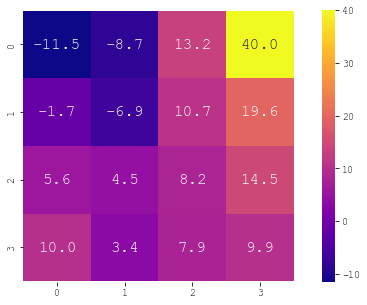

In [4]:
policy_eval1 = mc_evaluation_policy(env, discount_factor=1)
plot_grid(policy_eval1.reshape((4,4)))

#### Factor 0.9

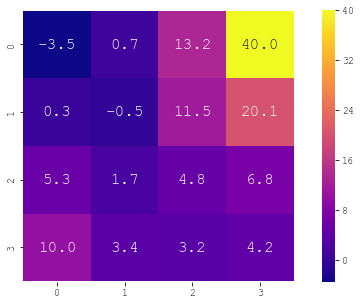

In [5]:
policy_eval2 = mc_evaluation_policy(env, discount_factor=0.9)
plot_grid(policy_eval2.reshape((4,4)))

## TD Learning

#### Factor 1

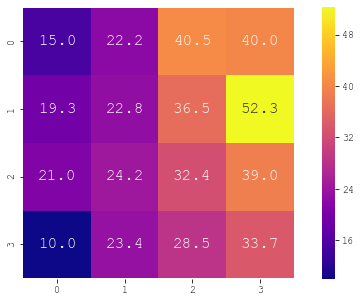

In [6]:
policy_eval1 = td_learning(env, discount_factor=1)
plot_grid(policy_eval1.reshape((4,4)))

#### Factor 0.9

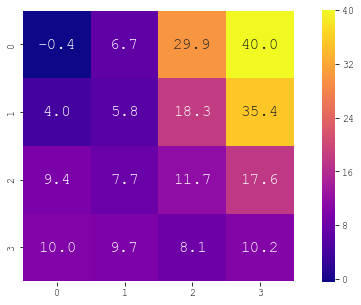

In [7]:
policy_eval2 = td_learning(env, discount_factor=0.9)
plot_grid(policy_eval2.reshape((4,4)))

## On-policy first-visit Monte-Carlo Control

#### Initialize rewards lists 

In [8]:
rewards = rewards_lists(16,4)

#### Visualize Q-Table

#### Factor 1

In [9]:
# Factor 1
grid_values = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=1, rewards=rewards)
print(grid_values)

[[ -2.          29.9          0.           0.        ]
 [-11.1         39.89         0.           0.        ]
 [ 39.75        40.           0.          29.9       ]
 [ 40.          40.          40.          40.        ]
 [ -1.5         34.65        29.          28.8       ]
 [ 17.1375      39.44666667  34.94285714  36.23333333]
 [ 39.64468085  39.84856322  39.58888889  38.37777778]
 [ 40.          39.86954023  39.70098039  39.63701657]
 [ 31.29333333  29.35        10.          39.06666667]
 [ 28.625       39.56340206  37.53076923  30.808     ]
 [ 39.55862069  39.68418414  39.2         38.37191011]
 [ 39.84653153  39.69297297  39.28954248  39.18680203]
 [ 10.          10.          10.          10.        ]
 [ 31.90625     38.91809045  33.05333333  10.        ]
 [ 39.46154812  38.9367713   38.65527638  34.59893617]
 [ 39.58163265  38.25581395  38.35294118  38.98611111]]


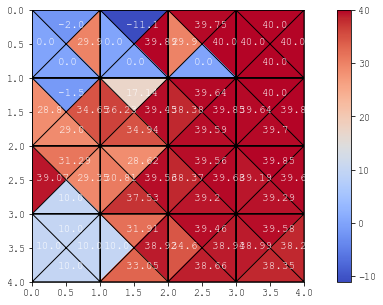

In [10]:
plot_q_table(grid_values)

#### Factor 0.99

In [11]:
# Factor 0.9
grid_values_2 = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=0.9, rewards=rewards)
print(grid_values_2)

[[-10.92243447   1.73212281   0.           0.        ]
 [-27.44575985  24.98755277  -0.71757046  -1.41667498]
 [ 17.10649385  40.          24.40987469  10.33731234]
 [ 40.          40.          40.          40.        ]
 [-10.91478654  24.1708178    0.           0.        ]
 [ 14.75107309  37.39031475  20.62998169  12.93442697]
 [ 30.35901618  36.95689954  33.76327597  27.392365  ]
 [ 40.          36.44905736  34.28730365  33.94552265]
 [  0.           0.           0.          14.76738223]
 [ 19.40792335  32.66744352  23.38987356  23.96647256]
 [ 33.61799869  34.3849863   31.11568273  30.20743697]
 [ 37.1500726   33.9578802   30.98288598  31.7571718 ]
 [ 10.          10.          10.          10.        ]
 [ 25.49663394  31.17940188  21.37115916  10.        ]
 [ 32.35596603  32.29943475  30.25350469  25.77951875]
 [ 33.41775475  33.21070737  31.72800179  31.16082262]]


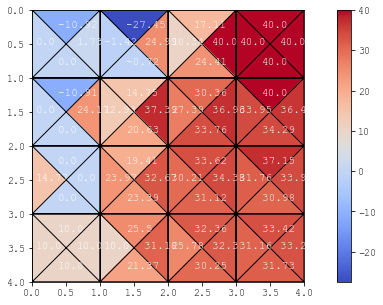

In [12]:
plot_q_table(grid_values_2)

## SARSA

#### Visualize maze rewards

#### Factor 1 

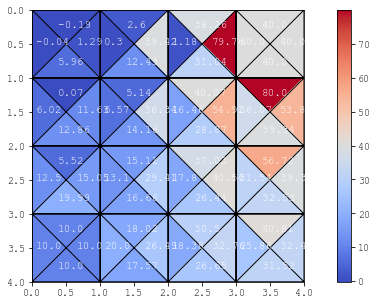

In [13]:
sarsa_1 = sarsa(env=env, discount_factor=1, alpha=0.01)
plot_q_table(sarsa_1)

#### Factor 0.9

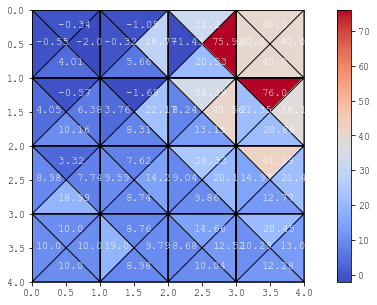

In [14]:
sarsa_2 = sarsa(env=env, discount_factor=0.9, alpha=0.01)
plot_q_table(sarsa_2)